# Simple plots
<p align="right">By Edward Sternin, Brock University</p>

This is an introductory notebook to various ways of plotting and analyzing experimental data, as appropriate to second-year Physics majors.  Feel free to choose your own preferred package, but mastering one of the tools in this selection is strongly recommended, as the demands on the software will become more significant in later years of the program, and so other packages (notably, <code>excel</code>) will not have sufficient capabilities.  Choose a package that has "long legs". 
<p>
A large number of software packages exist, and personal preferences play a great role in selecting which one will end up as your favourite go-to tool. Here we will restrict ourselves to a comparison of a few packages.  The criteria for selecting them are simple:
    <ul>
    <li> must be a free software;
    <li> must be available on multiple platforms (operating systems) that must include Linux;
    <li> must have scripting capability (do loops, subroutines with parameter passing, etc.);
    <li> must have ability to separate <i>data</i> from <i>commands</i>, so that the same set of commands could be applied to multiple data files, for repeat tasks.
    </ul>
Our selection: <a href="http://www.physics.brocku.ca/Labs/extrema/" target="_blank"><code>extrema</code></a> (or its predecessor, <a href="https://www.physics.brocku.ca/physica/" target="_blank"><code>physica</code></a>), <a href="http://www.gnuplot.info/" target="_blank"><code>gnuplot</code></a>, and <a href="https://www.gnu.org/software/octave/" target="_blank"><code>octave</code></a> (a free alternative to <a href="https://www.mathworks.com/products/matlab.html" target="_blank"><code>Matlab</code></a>). All of these are inherently interactive programs, and so they are normally used through a command-line interface (CLI) or their own native Graphics User Interface (GUI).  In this notebook, we will emulate that behaviour by using scripts, which is actually an advanced use mode for most programs. To get a true feel for the programs, please attempt to use their native interfaces, guided by the sample command selections below.
<p>
From a wide field of significant competitors not included here are <code>Maple</code> (a commercial package) and <code>grace</code> (a.k.a <code>xmgrace</code>), and Mac-world's <code>Igor</code>. These are reasonable alternatives so if you have significant skills in their scripting, they will be appropriate to continue to use, though they do not satisfy all of the selection criteria.
<p>
To begin with, configure jupyter's work directory and import some libraries that enable us to display graphics files in this notebook.

In [1]:
%%bash
WORKDIR=~/5P10/Lab2
# if the directory exists, remove it and all its contents
if [ -d $WORKDIR ]; then
  rm -rf $WORKDIR
fi
# and re-create it as a blank work directory
mkdir -p $WORKDIR

In [2]:
# now tell jupyter where to work
%cd ~/5P10/Lab2
%pwd

/home/esternin/5P10/Lab2


'/home/esternin/5P10/Lab2'

In [3]:
# import necessary libraries
from IPython.display import display
from PIL import Image

## Getting the data into the program
The two basic ways are: direct entry, where you embed the data in the script, and external file read. The former has the advantage of portability (one file to keep track of for any project), the latter has the advantage of compactness (a small script acting on a series of potentially large data files).
<p>
All three programs allow direct entry of data, with minor syntactic differences:
<p>
<dl>
    <dt><tt>physica</tt>, direct entry:
    <dd><blockquote><tt>
        x=[1:8]<br>
        y=[0.05;0.10;0.14;0.19;0.25;0.30;0.34;0.40]<br>
        dy=[0.02;0.07;0.01;0.04;0.05;0.10;0.02;0.04]<br>
        set xlabel &#96;Time, s'<br>
        set ylabel &#96;Distance, m'<br>
        set pchar -12<br>
        graph x,y,dy
        </tt>
       </blockquote>
       </dd>
    <dt><tt>gnuplot</tt>, direct entry:
    <dd><blockquote><tt>
        \$DATA &lt;&lt; EOD<br>
        1  0.05  0.02<br>
        2  0.10  0.07<br>
        3  0.14  0.01<br>
        4  0.19  0.04<br>
        5  0.25  0.05<br>
        6  0.30  0.10<br>
        7  0.34  0.02<br>
        8  0.40  0.04<br>
        EOD<br>
        <br>
        set xlabel 'Time, s'<br>
        set ylabel 'Distance, m'<br>
        plot \$DATA with errorbars pt 6
       </tt>
       </blockquote>
       </dd>
    <dt><tt>octave/matlab</tt>, direct entry:
    <dd><blockquote><tt>
       x=linspace(1,8,8);<br>
       y=[0.05 0.10 0.14 0.19 0.25 0.30 0.34 0.40];<br>
       dy=[0.02 0.07 0.01 0.04 0.05 0.10 0.02 0.04];<br>
       plot(x,y,'go');<br>
       xlabel("Time, s");<br>
       ylabel("Distance, m");<br>
       </tt>
       </blockquote>
       </dd>
</dl>
<p>
To demonstrate the plots within this notebook, we need to communicate to the external program, like <code>extrema</code>, or load on-the-fly a kernel magic that will enable execution of an external program directly embedded in this python-based notebook.
<p>
We will default all of the settings that control the appearance of the graphs, for simplicity. All of these programs can produce publication-quality plots through a series of adjustments to their appearance.  This will be addressed in the following sections.

## eXtrema

An experimental eXtrema kernel exists, but it is not yet installed system-wide, so each user must install it into their own file space. A separate jupyter notebook shows how to do it.  That notebook needs to be run only once, and then <em>this</em> notebook's kernel needs to be restarted, to read in the newly added eXtrema kernel. If you have already done that at some point, the eXtrema kernel should included in the drop-down list of kernels under the <b>Kernel</b> menu above. 

In [4]:
ls -l /work/extrema_kernel/

total 16
-rw-r--r-- 1 esternin LinuxEmployees 5406 Sep 12 10:17 extrema_kernel.py
-rw-r--r-- 1 esternin LinuxEmployees  234 Sep 12 10:17 kernel.json
drwxr-xr-x 2 esternin LinuxEmployees 4096 Oct 15 14:03 __pycache__/


In [5]:
import sys
sys.path.append('/work/extrema_kernel')
import extrema_kernel

Once extrema kernel is available in the drop-down menu of kernels, you do not need to repeat the above and the line magic <code>%eXtrema</code> and cell magic <code>%%eXtrema</code> should be available. Note that this kernel uses a simplified batch-mode version of <code>extrema</code> which may not have some commands implemented yet. The kernel returns an image file which we can then show within this notebook.

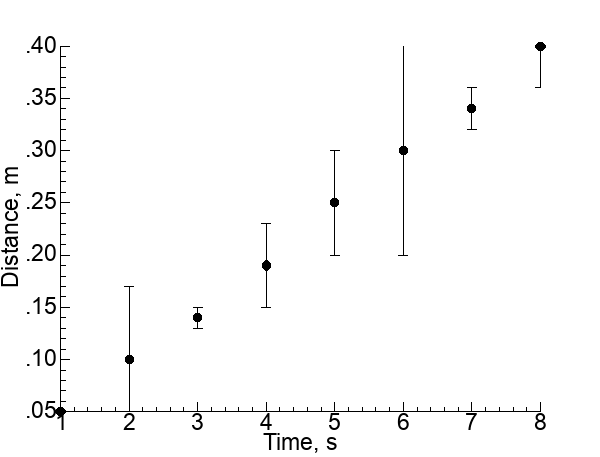

In [6]:
%%eXtrema
x=[1:8]
y=[0.05;0.10;0.14;0.19;0.25;0.30;0.34;0.40]
dy=[0.02;0.07;0.01;0.04;0.05;0.10;0.02;0.04]

set xlabel `Time, s'
set ylabel `Distance, m'
set plotsymbol -17

graph x,y,dy

## <tt>gnuplot</tt>

Kernel magic for gnuplot exists:

In [7]:
# This loads the gnuplot kernel extension, for embedded gnuplot use
%load_ext gnuplot_kernel
%gnuplot inline pngcairo size 640,480 font "Palatino,16"

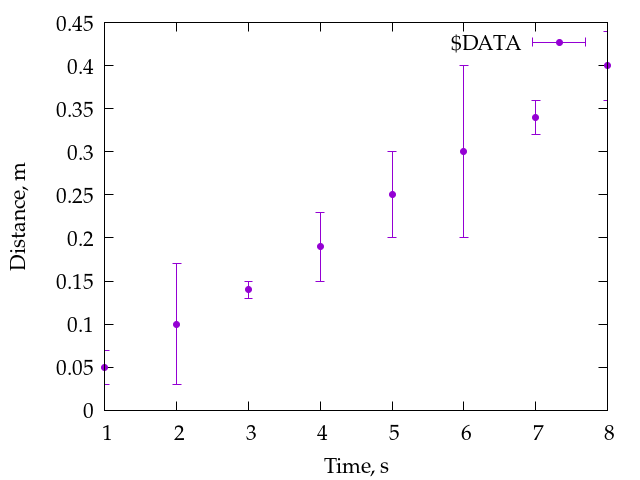

$DATA << EOD
 
 
 

In [8]:
%%gnuplot
$DATA << EOD
1 0.05 0.02
2 0.10 0.07
3 0.14 0.01
4 0.19 0.04
5 0.25 0.05
6 0.30 0.10
7 0.34 0.02
8 0.40 0.04
EOD

set xlabel 'Time, s'
set ylabel 'Distance, m'
plot $DATA with errorbars pt 7

## <tt>octave</tt>

Kernel magic for octave exists:

In [9]:
# This loads the octave kernel extension, for embedded octave use
%load_ext oct2py.ipython

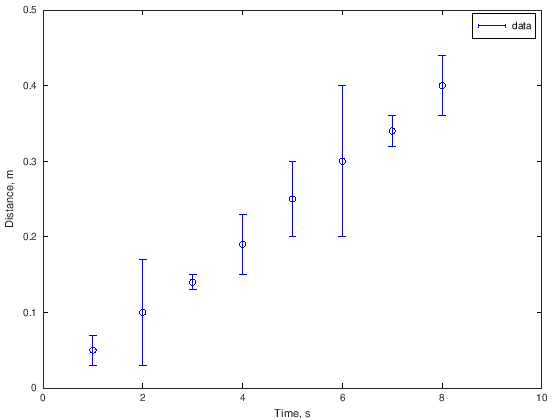

In [10]:
%%octave
x=linspace(1,8,8);
y=[0.05 0.10 0.14 0.19 0.25 0.30 0.34 0.40];
dy=[0.02 0.07 0.01 0.04 0.05 0.10 0.02 0.04];
errorbar(x,y,dy,'bo');
xlabel("Time, s");
ylabel("Distance, m");
legend("data");

# External file processing
<p>
With only minor changes the same scripts can be applied to external data files. Scripts below all accomplish the same basic read from a data file, a plot, followed by a number of adjustments of settings that approach the publication-quality standards of appearance. The output is not shown, but saved into into a vector-graphics file, ready to be uploaded/included into overleaf.  Encapsulated PostScript (.eps) or SVG (.svg) vector-graphics formats work best, as they scale without introducing "jaggies" and always display at the resolution of the device (typically, at about 100dpi on a monitor screen, and at 600dpi on paper). 
<p>
As of 2019, overleaf has support for SVG inclusion (<code>\usepackage{svg}</code> and <code>\includesvg{image.svg}</code>).
<p>
First, let's create the file of data to be plotted by each of the programs in turn:

In [11]:
%%file exp1.dat
1 0.05 0.02
2 0.10 0.07
3 0.14 0.01
4 0.19 0.04
5 0.25 0.05
6 0.30 0.10
7 0.34 0.02
8 0.40 0.04

Writing exp1.dat


## eXtrema

If you installed the experimental jupyter eXtrema kernel that introduces cell-level magic <code>%%eXtrema</code>, you can run <code>eXtrema</code> commands directly within this notebook.  However, some functionality is still missing, so a better way at the moment is to generate a macro file and then execute it from within <code>eXtrema</code> invoked outside of jupyter. This uses a full interactive version of <code>eXtrema</code>, so at the end when it processes your <code>basic.pcm</code> script that ends with a <code>quit</code> choose Yes when it offers to terminate the run. The resulting .eps file can be seen with a PDF viewer (e.g. <code>evince</code>) and is ready to be uploaded to overleaf.

In [12]:
%%file basic.pcm
clear
defaults

read exp1.dat x,y,dy

set  xlabel `Time, s'
set  ylabel `Distance, m'
set  yleadz 1
set  %xlaxis 16
set  legendon 1
set  legendframeon 0
set  %legendframe 18 65 50 85
set  legendsymbols 3
set  legendentrylineon 0
set  %textheight 3
set  plotsymbol -17
set  %plotsymbolsize 1.7
set  curvecolor red
set  box 1

scales 0 9 9 0 0.45 9
graph `data' x,y

scalar\vary a,b
fit\e2 y=a*x^2+b

generate xx x[1],,x[#] 1000
set plotsymbol 0
set  legendentrylineon 1
graph\overlay rchar(a,`y=%6.4ft<^>2<_>+')//rchar(b,`%6.4f') xx,a*xx^2+b

replot
hardcopy\POSTSCRIPT extrema.eps
hardcopy\PNG basic.png
quit

Writing basic.pcm


In [13]:
%%bash
extrema --script basic.pcm
ls -la extrema.eps basic.png

-rw-r--r-- 1 esternin LinuxEmployees 37470 Oct 17 16:22 basic.png
-rw-r--r-- 1 esternin LinuxEmployees 39103 Oct 17 16:22 extrema.eps


# gnuplot

Data importation is actually difficult to achieve in <tt>gnuplot</tt> because it's primarily a plotting program, and data manipulation is not really its strength. On the other hand, plotting data from external ASCII data files is particularly easy, as this is precisely what <tt>gnuplot</tt> was originally designed for.
<p>
Using the same data file as above:

In [14]:
%gnuplot postscript eps colour size 6.4,4.8 font "Palatino,32" 

In [15]:
%%gnuplot
reset
set output 'gnuplot.eps'
set encoding utf8
set style data points

set dummy x, y
f(x) = a*x**2+b
# gnuplot's fitting variables MUST be initialized to non-zero values!
a=1.0
b=1.0
fit f(x) 'exp1.dat' via a,b

set xlabel 'Time, s'
set ylabel 'Distance, m'
set xrange [0.5:8.5]
set yrange [0:0.5]

plot 'exp1.dat' with errorbars pt 7 ps 2 title "data from exp1.dat",\
     f(x) title sprintf("best fit: %.4f t^2 + %.4f",a,b)

fit f(x) 'exp1.dat' via a,b
iter      chisq       delta/lim  lambda   a             b            
   0 9.0568363000e+03   0.00e+00  2.34e+01    1.000000e+00   1.000000e+00
   1 3.3906186412e+01  -2.66e+07  2.34e+00    4.446168e-02   9.725188e-01
   2 1.0093949569e+00  -3.26e+06  2.34e-01   -7.587122e-03   6.416660e-01
   3 4.6402022173e-03  -2.17e+07  2.34e-02    5.086764e-03   9.528535e-02
   4 4.3637955261e-03  -6.33e+03  2.34e-03    5.301084e-03   8.607298e-02
   5 4.3637955182e-03  -1.80e-04  2.34e-04    5.301120e-03   8.607143e-02
iter      chisq       delta/lim  lambda   a             b            

After 5 iterations the fit converged.
final sum of squares of residuals : 0.0043638
rel. change during last iteration : -1.80068e-09

degrees of freedom    (FIT_NDF)                        : 6
rms of residuals      (FIT_STDFIT) = sqrt(WSSR/ndf)    : 0.0269685
variance of residuals (reduced chisquare) = WSSR/ndf   : 0.000727299

Final set of parameters            Asymptotic Standard Er

# <tt>octave</tt>

The use of comments makes the following script self-explanatory, hopefully. <tt>octave</tt> kernel actually will return a PNG graphic that will show up when you execute the script, in addition to writing out the EPS file.

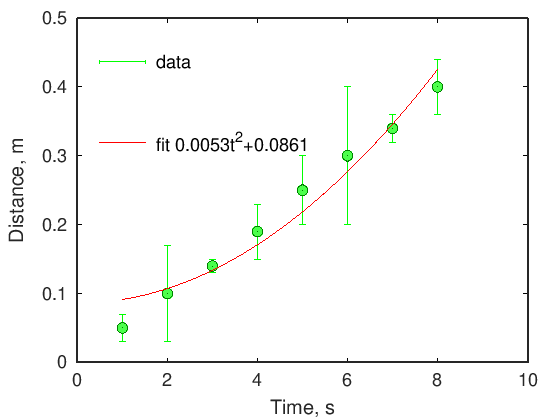

In [16]:
%%octave
### read in the data from a file, 3 columns
[x,y,dy]=textread('exp1.dat',"%f %f %f");

### this is needed if the graph is to contain multiple plots
hold on

g=errorbar(x,y,dy,'go');
### refine: some properties belong to the plot, identified by its "handle" g
set(g, 'MarkerSize', 10, 'MarkerFaceColor', [.3 1 .3], 'MarkerEdgeColor', [0 .5 0]);
### some others belong to the Axes of all plots, gca = Get Current Axes handle
set(gca, "linewidth", 4, "fontsize", 18, "box", "on");

### fit to n-degree polynomial yields a vector of n+1 coefficients of fit
### a logical vector indicates whether to skip some terms, e.g. to n=2, skipping the linear term
cf = polyfit(x,y,[true,false,true]);
### which can be used to generate a polynomial function that can be plotted
#plot(V,polyval(cf,V),'r-');

### except there aren't enough points to define a smooth curve, 
### so apply the same fit coefficients to a much finer-grid vector
xx = linspace(min(x),max(x),1000);
plot(xx,polyval(cf,xx),'r-');

xlabel("Time, s");
ylabel("Distance, m");
legend({"data",sprintf("fit %.3dt^2+%.3d",cf(1),cf(3))},"location","northwest");
legend boxoff;
### in Octave v<4.2.2 there was a bug in the legend() command for errorbar() entries
### One could use title() as a workaround 
#title(sprintf("Best fit %.3dt^2+%.3d",cf(1),cf(3)));

hold off

print -deps -color octave.eps

Use an external PDF viewer to examine and compare the three EPS files that got created, <tt>physica.eps</tt>, <tt>gnuplot.eps</tt> and <tt>octave.eps</tt>.

In [17]:
%%bash
ls -la extrema.eps gnuplot.eps octave.eps

-rw-r--r-- 1 esternin LinuxEmployees 39103 Oct 17 16:22 extrema.eps
-rw-r--r-- 1 esternin LinuxEmployees 26688 Oct 17 16:22 gnuplot.eps
-rw-r--r-- 1 esternin LinuxEmployees 36770 Oct 17 16:22 octave.eps


## Why not <tt>python</tt>?

This is an obvious question to ask, since we are already using a python-based <tt>jupyter notebook</tt> to run this discussion and comparison. <tt>python</tt> is a powerful programming environment, with a large number of packages available, of varying quality. <tt>python</tt> is fully capable of generating simple graphs. However, in my experience, extending this to publication-quality outputs is more difficult in <tt>python</tt> than in almost any other environment. 
<p>
More importantly, its object-oriented style of coding is difficult to master on a casual basis, and is easily forgotten, if used rarely. As an illustration, I find that this 
<pre>
   data=numpy.loadtxt('exp1.dat')
   x = data[:,0]
   y = data[:,1]
   dy= data[:,2]
   def f(x, a, b): return a*x**2 + b
   scipy.optimize.curve_fit(f, x, y, p0=[1, 0])
</pre>
a lot less readable than this (for <tt>gnuplot</tt>)
<pre>
   f(x) = a*x**2+b
   a=1
   b=1
   fit f(x) 'exp1.dat' via a,b
</pre>
or this (for <tt>physica</tt>)
<pre>
   read exp1.dat x,y,dy
   scalar\vary a,b
   fit y=a*x^2+b
</pre>
<p>
    In other courses of the Physics program, <tt>python</tt> may prove more suitable, especially if specific-purpose libraries are available to help, but for the everyday scientific tasks of analyzing and plotting data, procedurally-based languages offer an easier way to perform them.
<p>
For an interesting, if somewhat discouraging read, look at https://realpython.com/python-matplotlib-guide/ just to see how idiosyncratic python's interface can be, from stucture to terminology. Without comment, below is a brief example of a properly-syntaxed "simple" plot in python.

1.00 0.05 0.02
2.00 0.10 0.07
3.00 0.14 0.01
4.00 0.19 0.04
5.00 0.25 0.05
6.00 0.30 0.10
7.00 0.34 0.02
8.00 0.40 0.04


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


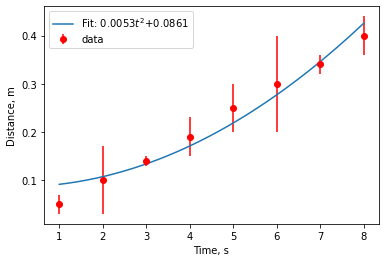

In [18]:
# multiple libraries for non-core functions need to be imported: 
#   plotting, numerical functions, least squares fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

# inline declaration of x,y,dy values
#x=np.linspace(1,8,num=8)
#y=[0.05,0.10,0.14,0.19,0.25,0.30,0.34,0.40]
#dy=[0.02,0.07,0.01,0.04,0.05,0.10,0.02,0.04]

# reading data from a file
data=np.loadtxt('exp1.dat')
x = data[:,0]
y = data[:,1]
dy= data[:,2]

for i in range(len(x)): print('{:.2f} {:.2f} {:.2f}'.format(x[i], y[i], dy[i]))

fig, ax = plt.subplots(figsize=(6,4))
ax.set_ylabel('Distance, m')
ax.set_xlabel('Time, s')
ax.errorbar(x=x, y=y, yerr=dy, fmt='ro', label="data")

#define the fit equation
def f(x, a, b): return a*x**2 + b

#use it to perform the best fit to the data
params, params_covariance = optimize.curve_fit(f, x, y, p0=[1, 0])

# add the smooth curve on the data, using a much finer point grid across the same range
xx=np.linspace(x[0],x[-1],num=1000)
ax.plot(xx, f(xx, params[0], params[1]), label='Fit: {:.4f}$t^2$+{:.4f}'.format(params[0], params[1]))

ax.legend(loc='best')

plt.savefig('python.eps', format='eps', dpi=600)

In [19]:
%%bash
ls -sh gnuplot.eps octave.eps extrema.eps python.eps
file extrema.eps gnuplot.eps octave.eps python.eps

40K extrema.eps
28K gnuplot.eps
36K octave.eps
24K python.eps
extrema.eps: PostScript document text conforming DSC level 3.0, type EPS, Level 2
gnuplot.eps: PostScript document text conforming DSC level 2.0, type EPS
octave.eps:  PostScript document text conforming DSC level 2.0, type EPS
python.eps:  PostScript document text conforming DSC level 3.0, type EPS


The output files are shown below as bitmap images, at the resolution of the web interface of <tt>jupyter</tt>, just for illustration. Their bitmap renderings may not do them justice. The images themselves are vector graphics and will scale properly, without "jaggies", when included in a LaTeX/overleaf document.

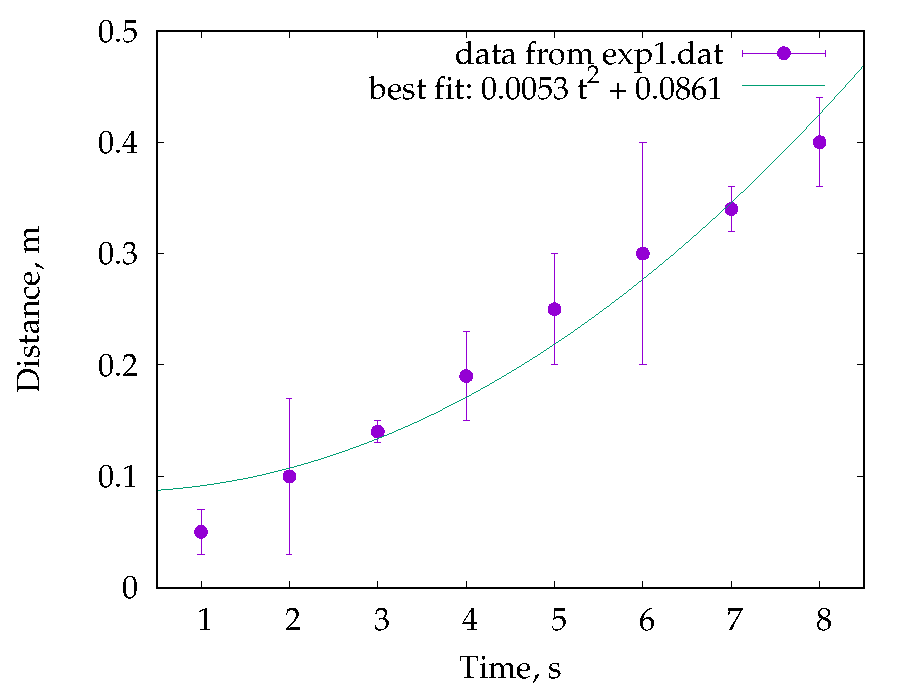

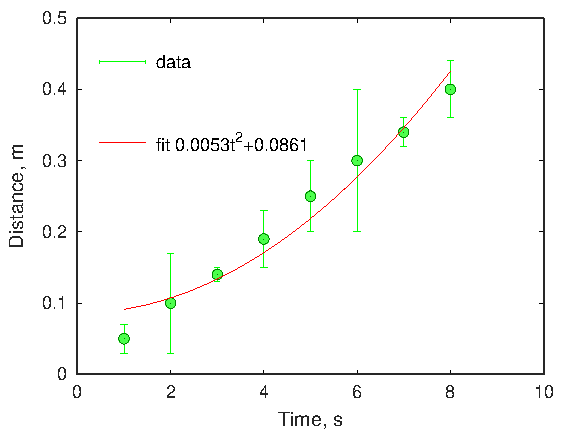

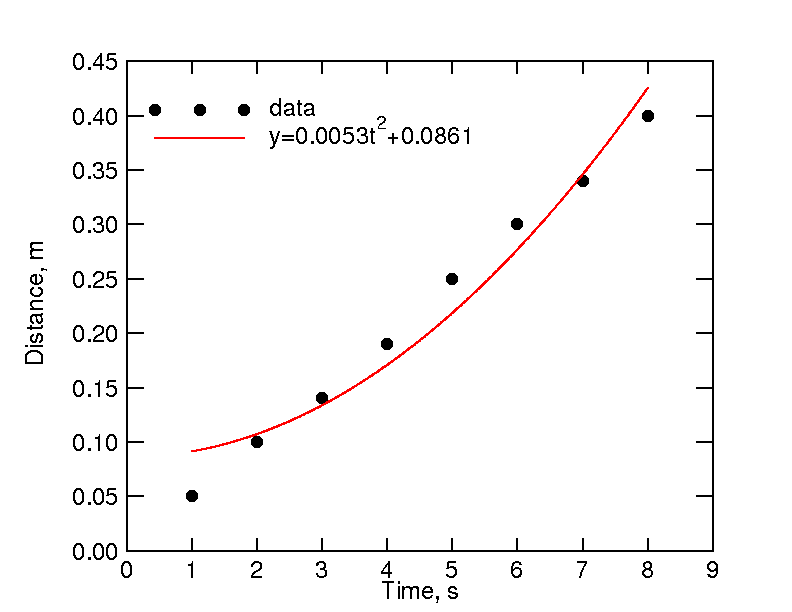

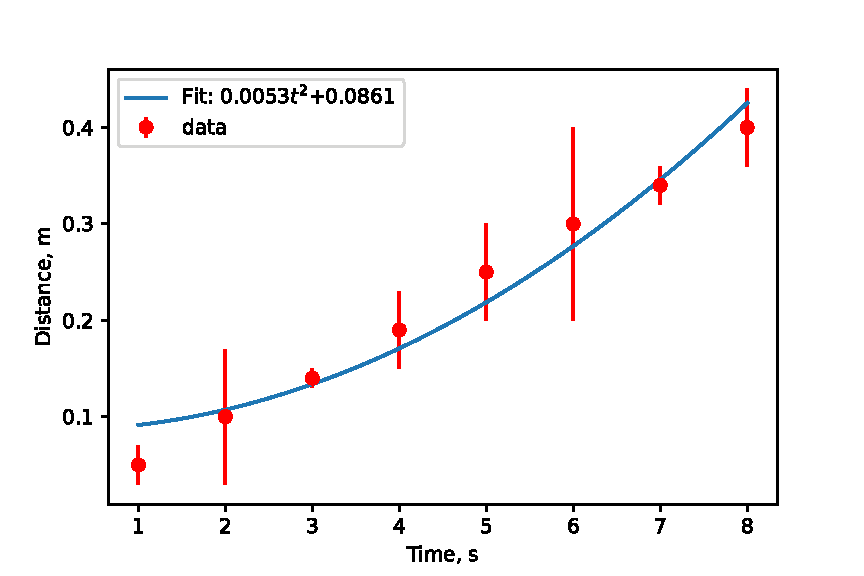

In [20]:
img1 = Image.open("gnuplot.eps")
img1.load(scale=2)
img2 = Image.open("octave.eps")
img2.load(scale=1)
img3 = Image.open("extrema.eps")
img3.load(scale=1)
#img3 = img.rotate(90, expand=-1)
img4 = Image.open("python.eps")
img4.load(scale=2)
display(img1,img2,img3,img4)
